In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import log
from matplotlib import cm


# Caminata clásica

En este código se mostrará la construcción de una caminata discreta, unidimensional, aleatoria, clásica y sesgada en profundidad. También se caracterizará la caminata en base a la evolución de la dispersión, calculada según la varianza de la distribución de probabilidad en el tiempo. Se tendrán las siguientes definiciones:

$t$: número de pasos de la caminata

$n$: posición respecto al nodo origen

$n_0$: nodo origen o posición inicial

$d$: cantidad de nodos del grafo unidimensional

$\alpha$: parámetro de sesgo. Si aumenta, es mayor la probabilidad de alejarse del nodo origen.

Cabe aclarar que, mientras el número de pasos t sea menor a (d+1)/2, se puede considerar que los resultados coinciden con los de un grafo unidimensional infinito.

## Revisión numérica

Se hará uso de la siguiente ecuación para calcular la distribución $\mathbf{p}^t$:

$$
\mathbf{p}^t = (1-2\alpha)\mathbf{p}^{t-2}+\alpha A\cdot\mathbf{p}^{t-1}
    \label{distr_clas}
$$

$$    
    p_n^t = (1-2\alpha)p_n^{t-2}+\alpha(p_{n-1}^{t-1}+p_{n+1}^{t-1})
    \label{prob_clas}
$$

In [2]:
d = 101

In [3]:
alpha = 0.5

In [4]:
n0 = 51

Creación de la matriz de adyascencia $A$ para el grafo unidimensional.

In [5]:
A = np.zeros((d, d), dtype=int)
    
for i in range(d):
    for j in range(d):
        if abs(i - j) == 1:
            A[i, j] = 1

In [6]:
A

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

Primera distribución $\mathbf{p}^0$

In [7]:
P0 = np.zeros(d, dtype=int)
P0[n0-1] = 1

In [8]:
P0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Esta función calcula la distribución $\mathbf{p}^t$ con $\alpha$, $t$, la matriz de adyascencia $A$ y la distribución inicial $\mathbf{p}^0$ cómo parámetros de entrada.

In [9]:
cache = {}

def difusion(alpha, t, A, P0):
    if t == 0:
        return P0
    if t == 1:
        P1 = 0.5 * np.dot(A, P0)
        return P1
    if t in cache:
        return cache[t]
    Ptmm = difusion(alpha, t - 2, A, P0)
    Ptm = difusion(alpha, t - 1, A, P0)
    Pt = (1 - 2 * alpha) * Ptmm + alpha * np.dot(A, Ptm)
    cache[t] = Pt
    return Pt

Dada una distribución $\mathbf{p}^t$ y la posición inicial $n_0$, esta función calcula la varianza, que es nuestro indicativo de dispersión.

In [10]:
def disp(Pt, n0):
    sum = 0
    for n, Pnt in enumerate(Pt):
        sum += ((n+1-n0)**2)*Pnt
    return sum
    

A continuación se calcularán entonces las distribuciones de los $t$ pares, y la dispersión para cada distribución:

In [11]:
Pt = []
St = []
for t in range(0, int((d-1)/2)+1, 1):
    Pt.append(difusion (alpha, t, A, P0))
    St.append(disp(Pt[-1], n0))

In [12]:
for i in Pt:
    print (i)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.25 0.   0.5  0.   0.25 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.

In [13]:
print(St)

[0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0]


En este caso, para mayor claridad, se graficarán sólamente los elementos pares, debido a que los impares son nulos.

In [14]:
def graf_distr(Pt, alpha):
    indices = np.arange(len(Pt[0]))
    indices_pares = indices[::2]

    Pt_pares = []
    for i in Pt:
        Pt_pares.append(i[::2])
    Pt_pares = Pt_pares[::2]

    colores = plt.cm.viridis(np.linspace(0, 1, len(Pt_pares)))


    if len(Pt_pares)>(indices_pares[-1]/4):
        for i, (P, color) in enumerate(zip(Pt_pares, colores)):
            plt.plot(indices_pares, P, color=color)


        # Crear una barra de color para mostrar los valores de t
        cmap = cm.viridis
        norm = plt.Normalize(vmin=0, vmax=(len(Pt_pares)*2)-2)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        # Agrega el eje al que se debe colocar la barra de color (ax)
        cbar = plt.colorbar(sm, ticks=[min(indices_pares)/2,indices_pares[len(indices_pares) // 4], max(indices_pares)/2], ax=plt.gca())
        cbar.set_label('$t$')
    else:
        for i, (P, color) in enumerate(zip(Pt_pares, colores)):
            plt.plot(indices_pares, P, label=f't = 50',color=color)
        plt.legend()
    
    plt.xlabel('$n$')
    plt.ylabel('$P_n^t$')
    plt.title(f' (alpha = {alpha})')
    plt.grid(True)

    plt.show()

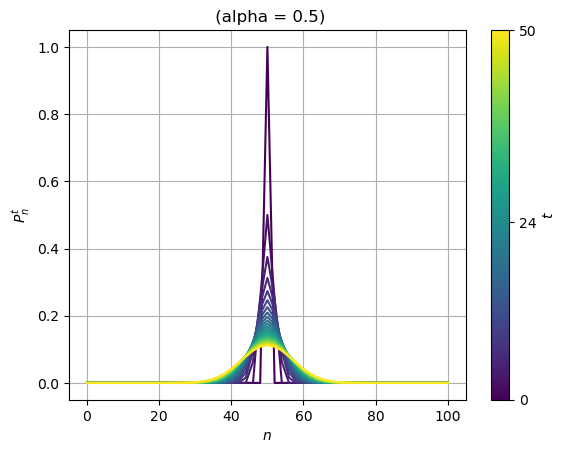

In [15]:
graf_distr(Pt, alpha)


Veremos el comportamiento de esta caminata para diferentes valores de $\alpha$.

In [16]:
alphavec = np.concatenate((np.arange(0.01, 0.1, 0.01),np.arange(0.1, 1.1, 0.1)))
alphavec = np.concatenate((np.arange(0, 0.01, 0.002),alphavec))
print(alphavec)

[0.    0.002 0.004 0.006 0.008 0.01  0.02  0.03  0.04  0.05  0.06  0.07
 0.08  0.09  0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.   ]


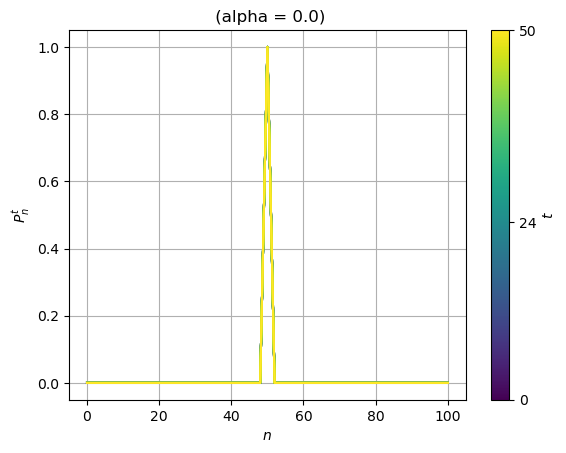

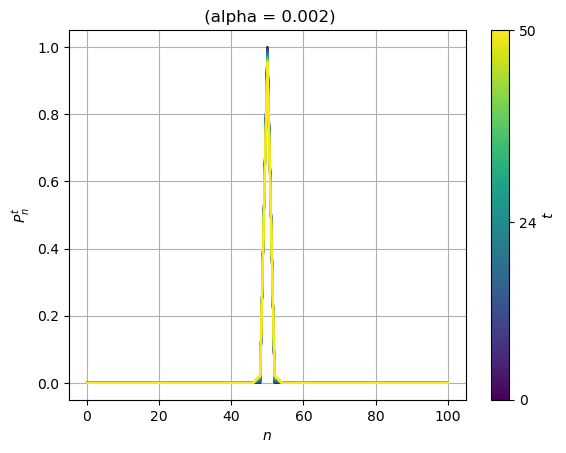

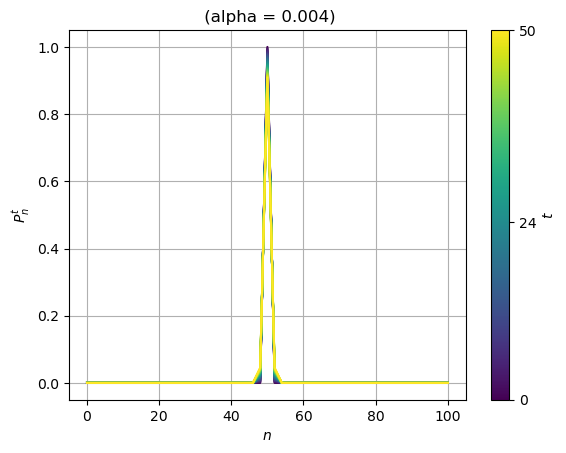

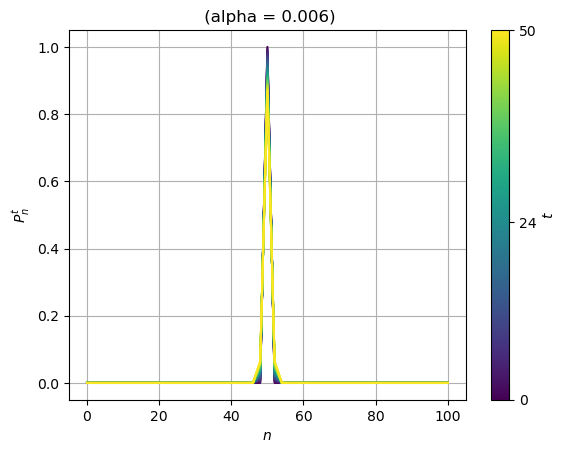

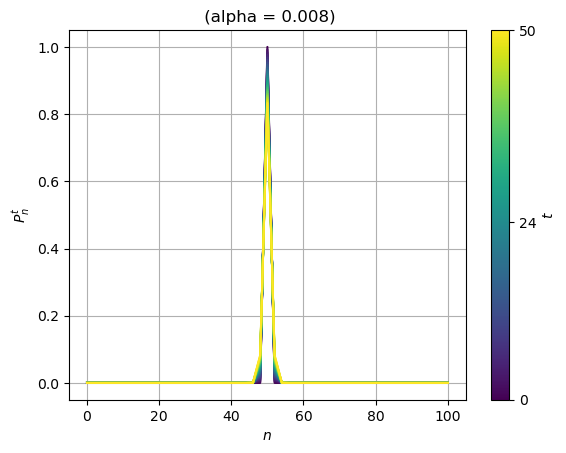

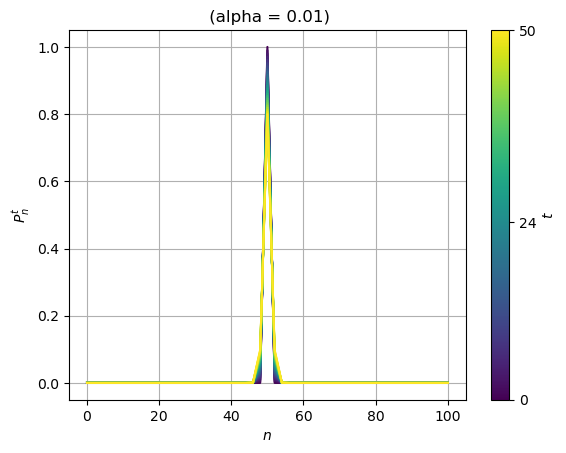

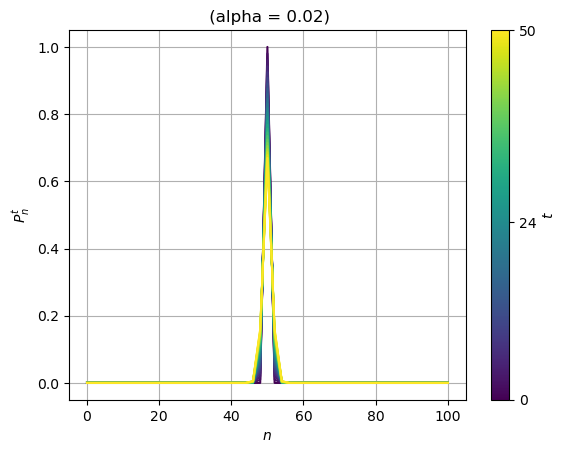

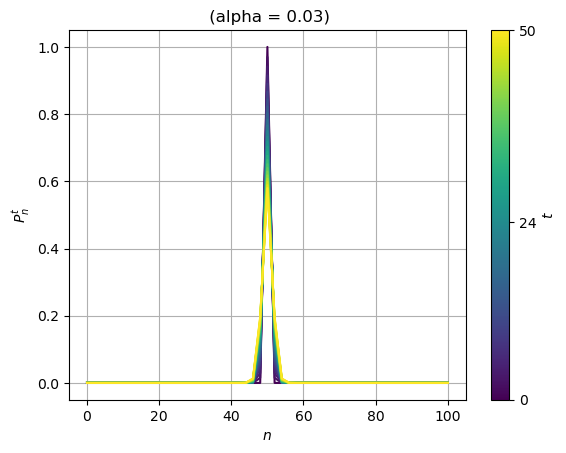

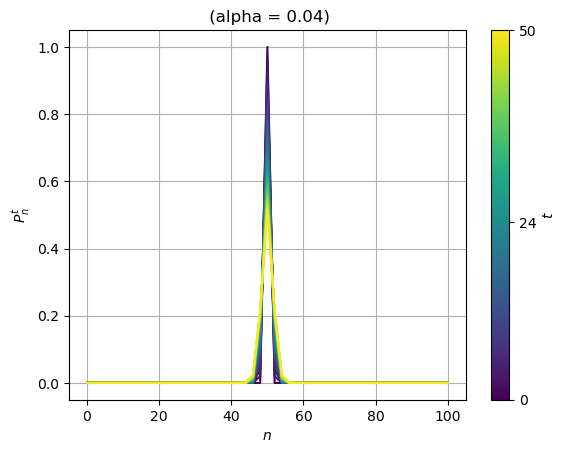

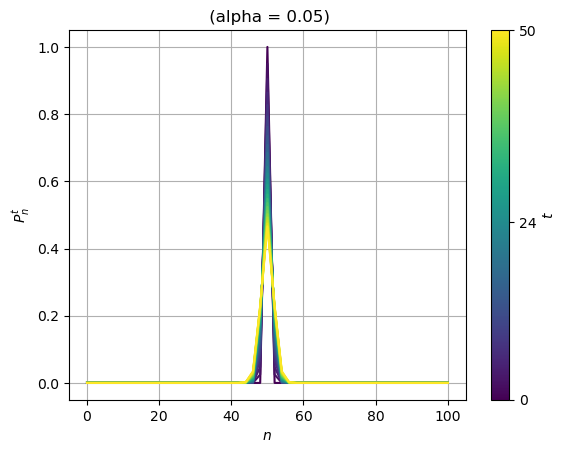

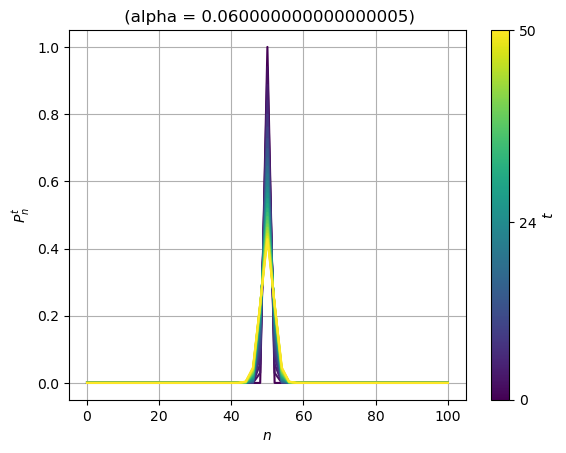

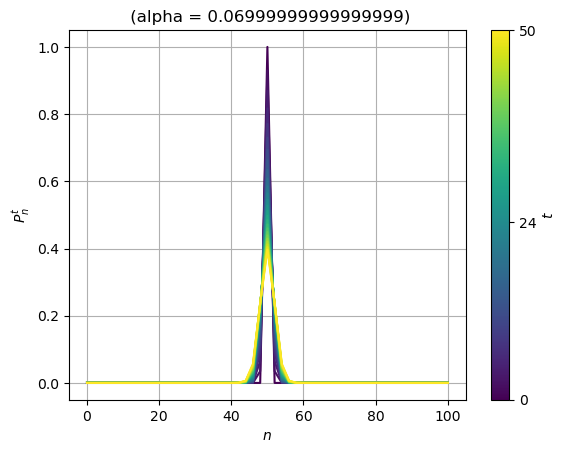

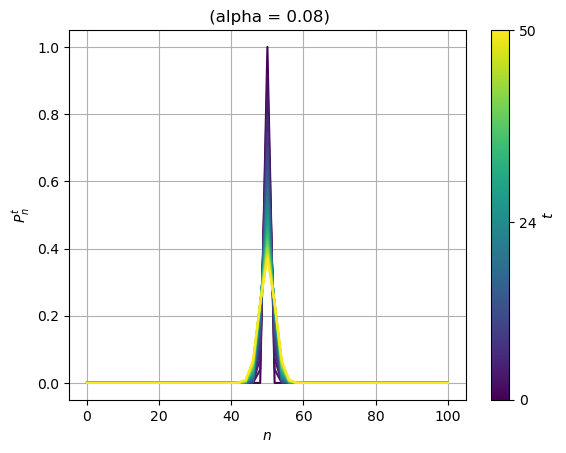

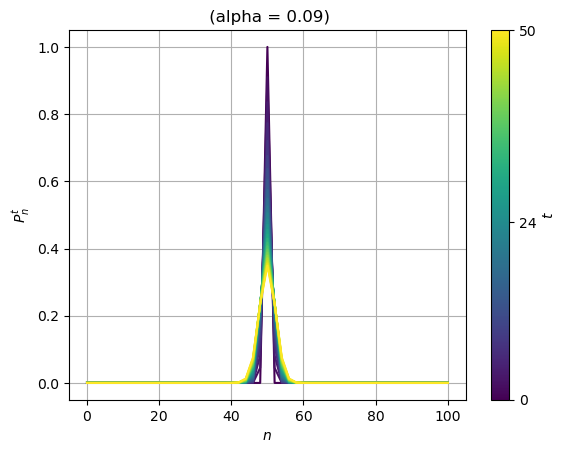

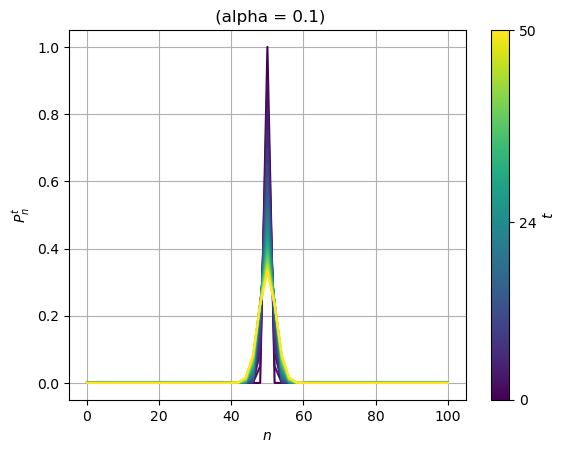

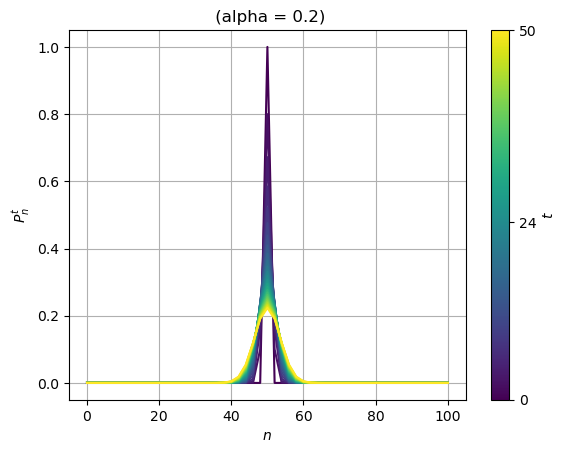

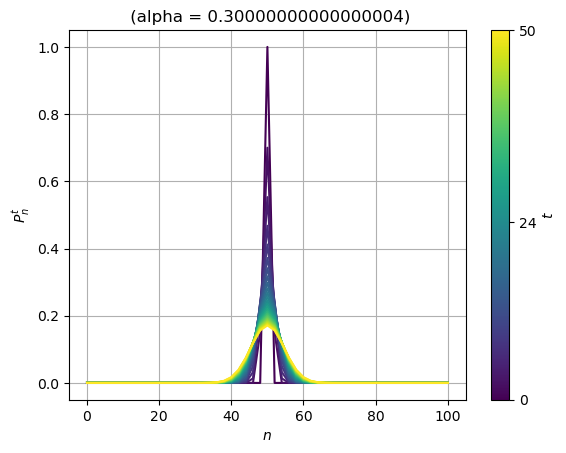

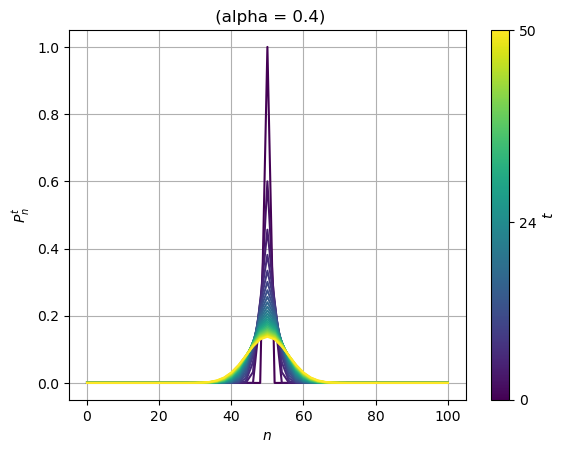

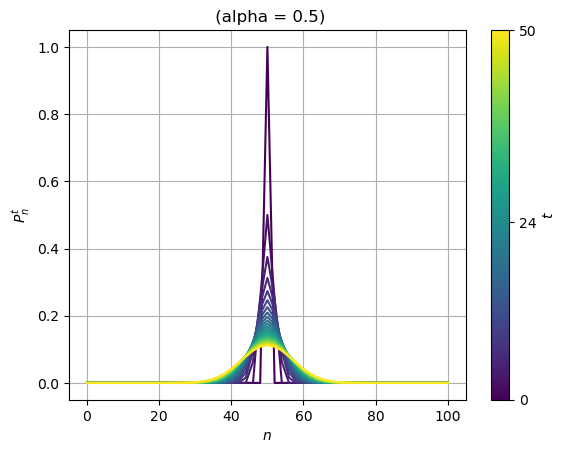

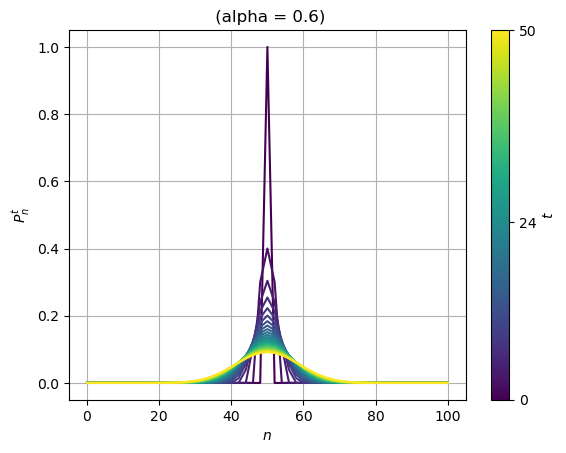

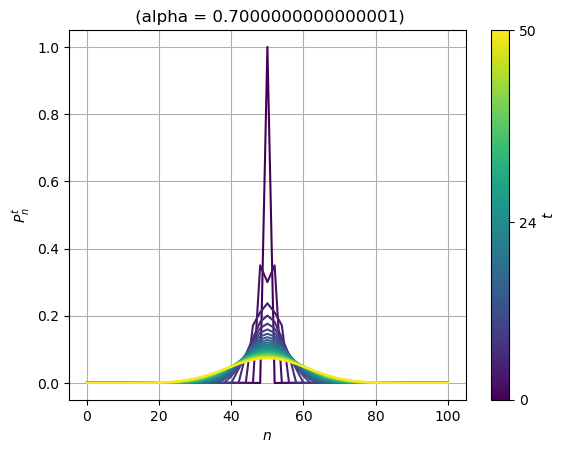

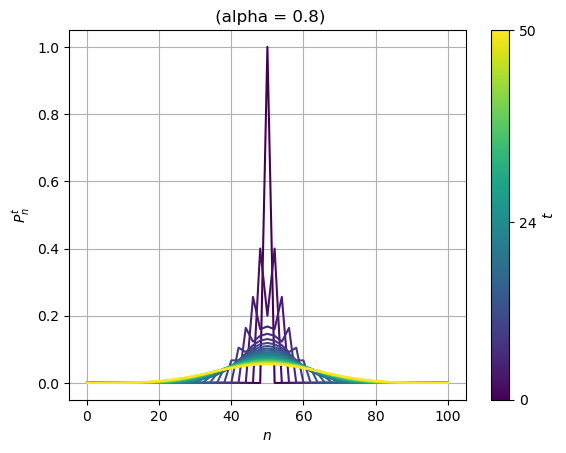

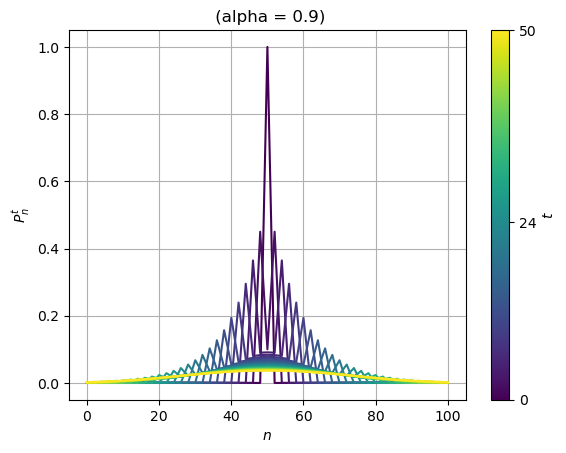

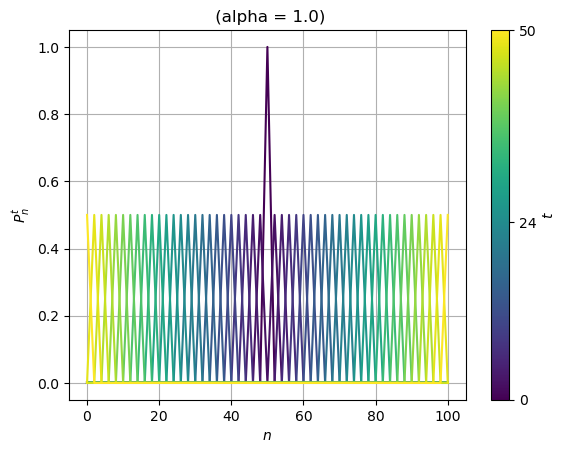

In [17]:
Ptvec = []
Stvec = []

for alp in alphavec:
    cache = {}
    Pt2 = []
    St2 = []
    for t in range(0, int((d-1)/2)+1, 1):
        Pt2.append(difusion (alp, t, A, P0))
        St2.append(disp(Pt2[-1], n0))
    graf_distr(Pt2, alp)
    Ptvec.append(Pt2)
    Stvec.append(St2)

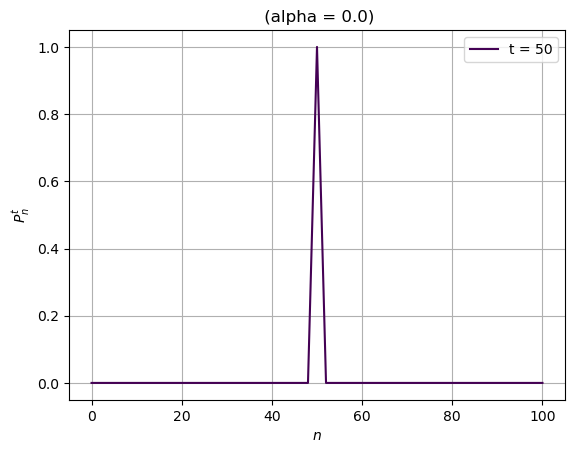

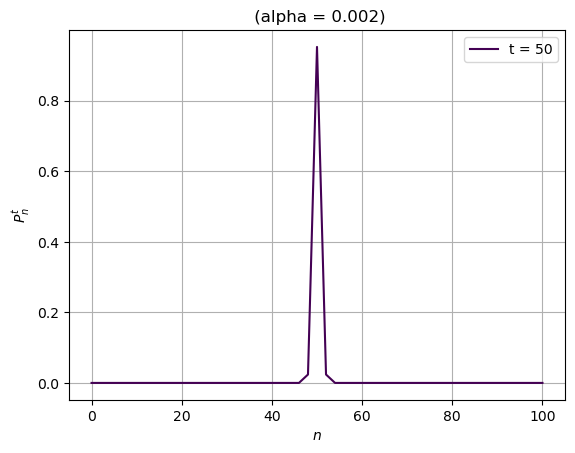

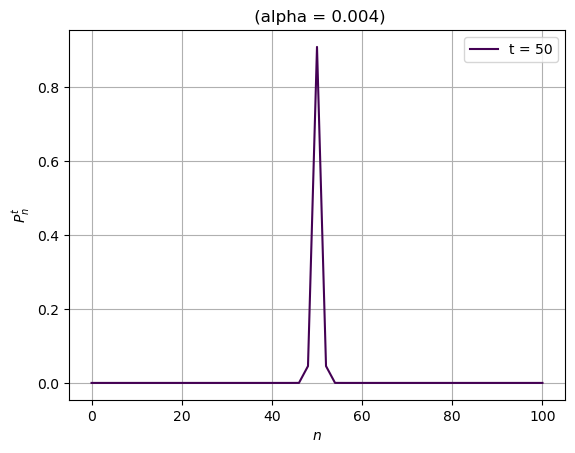

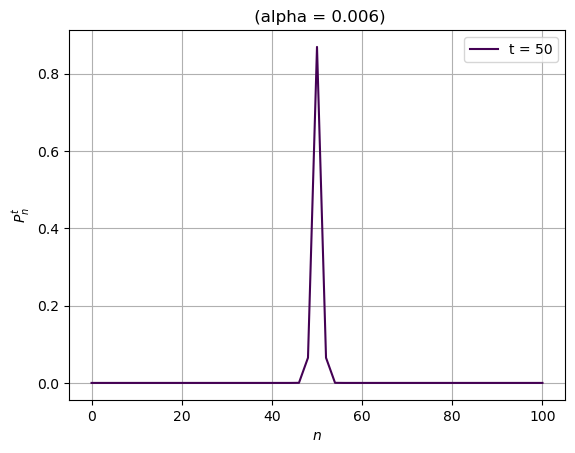

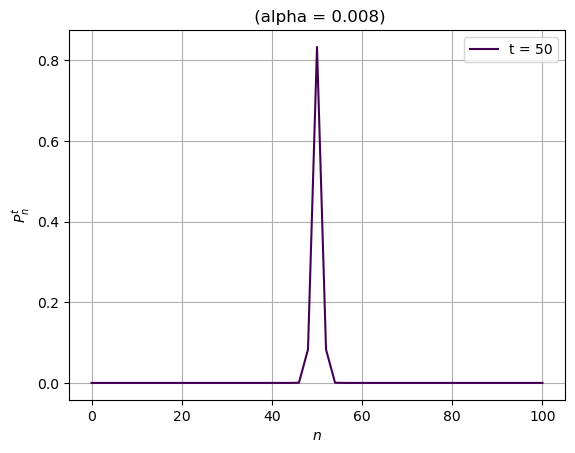

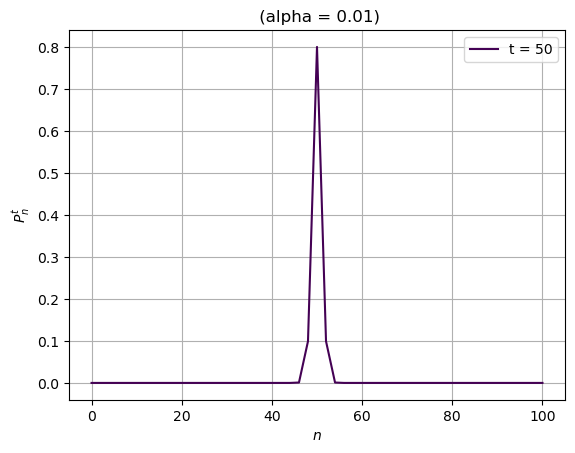

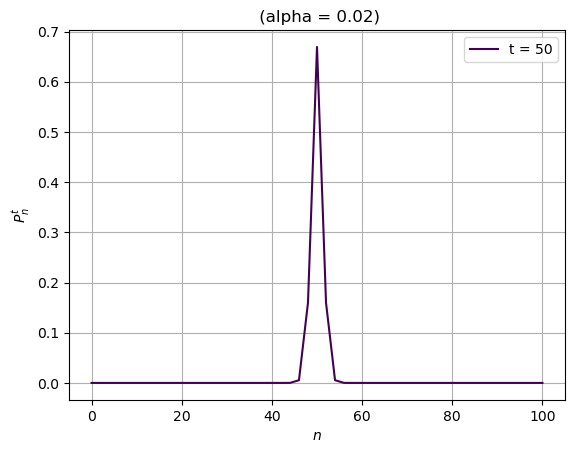

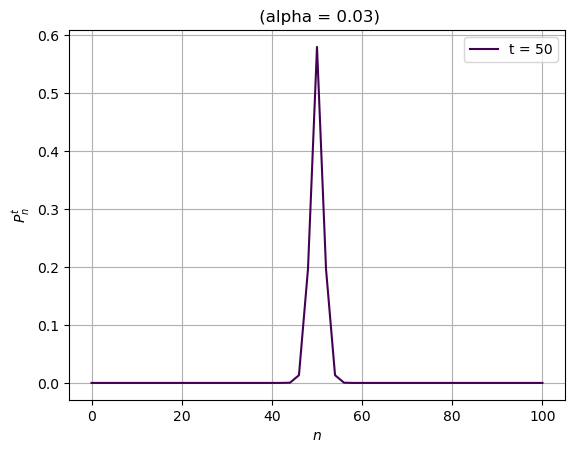

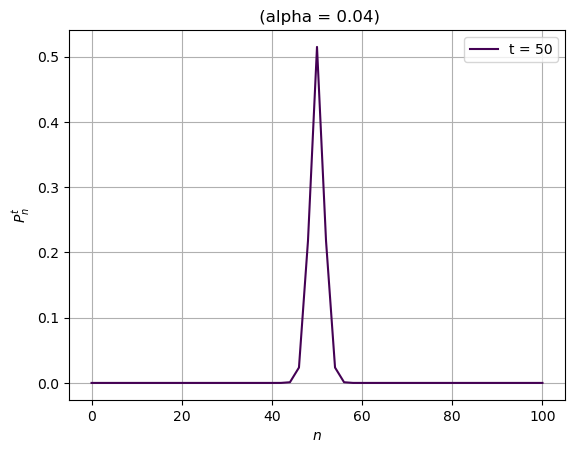

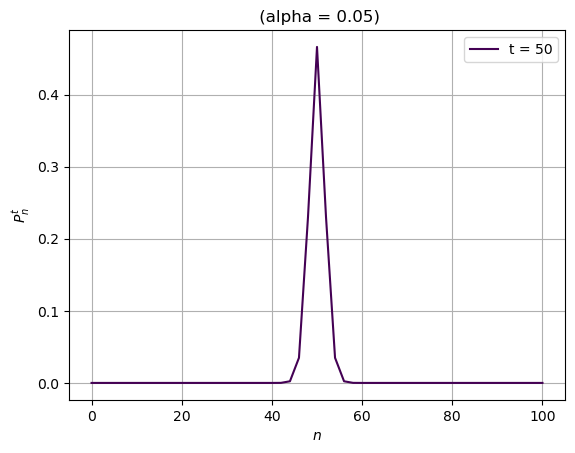

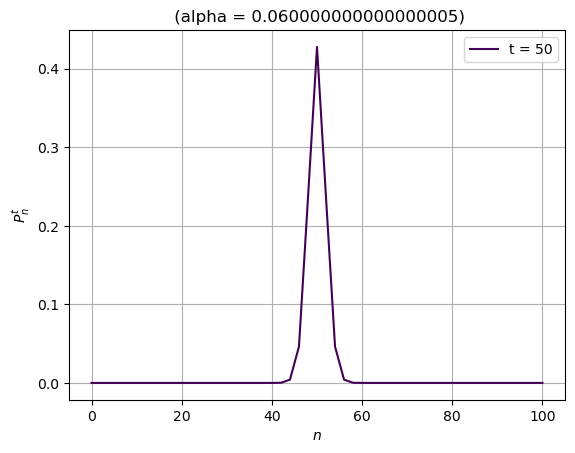

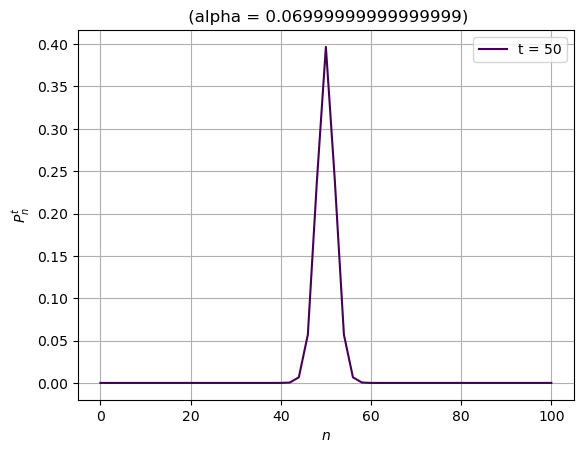

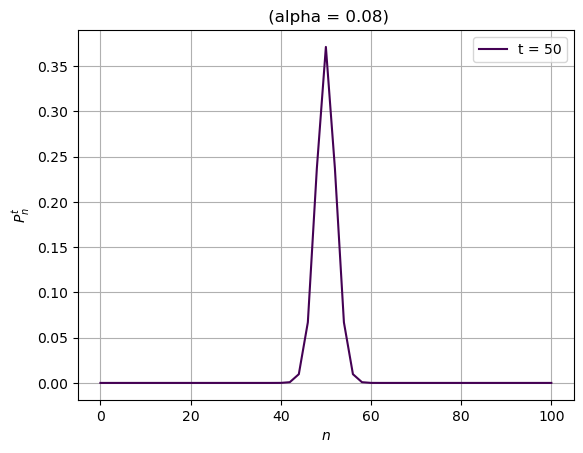

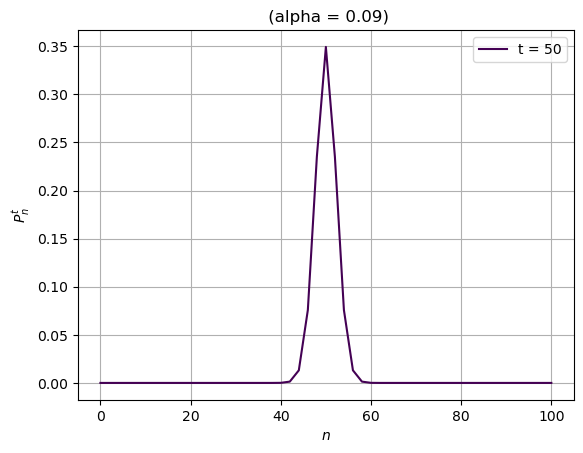

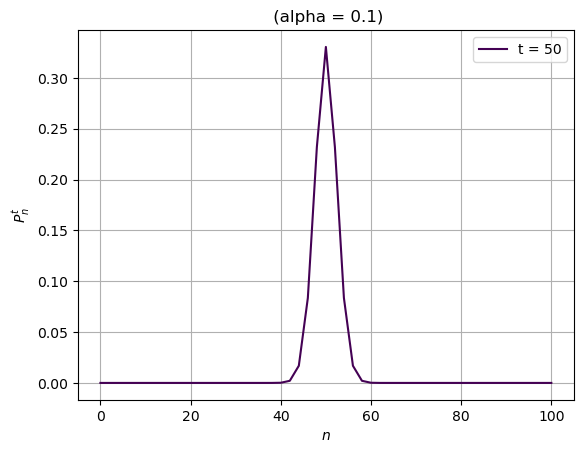

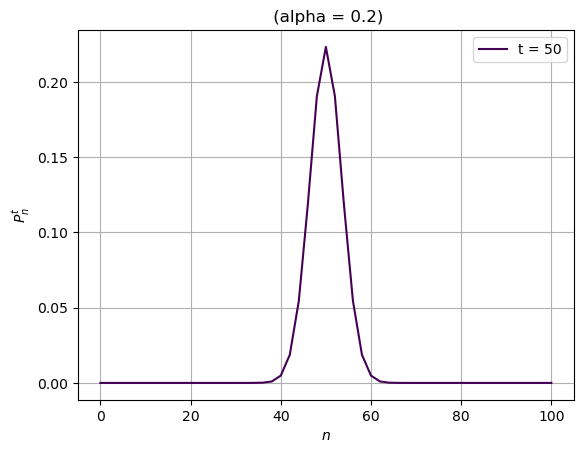

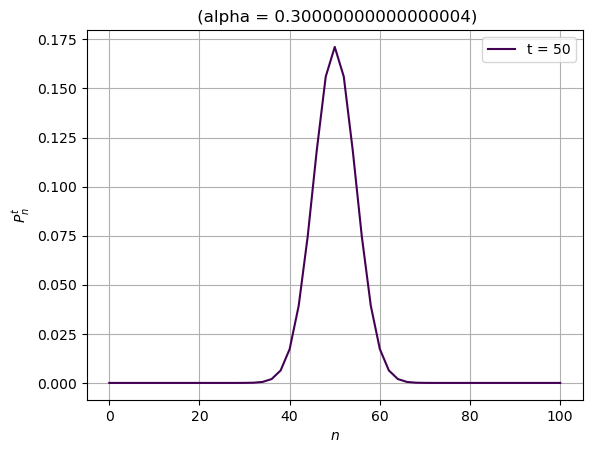

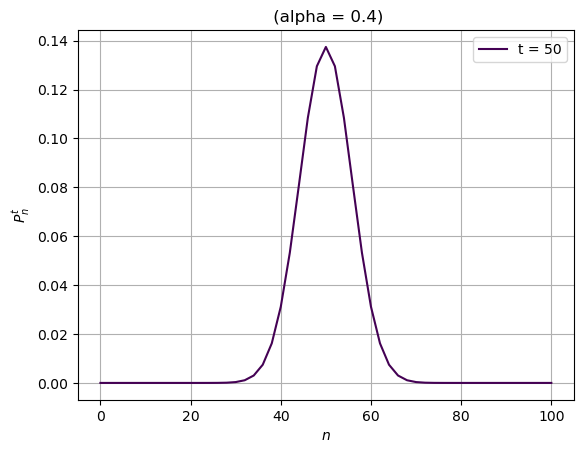

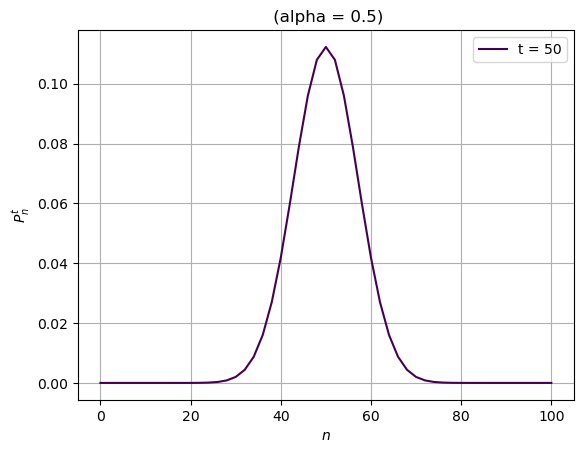

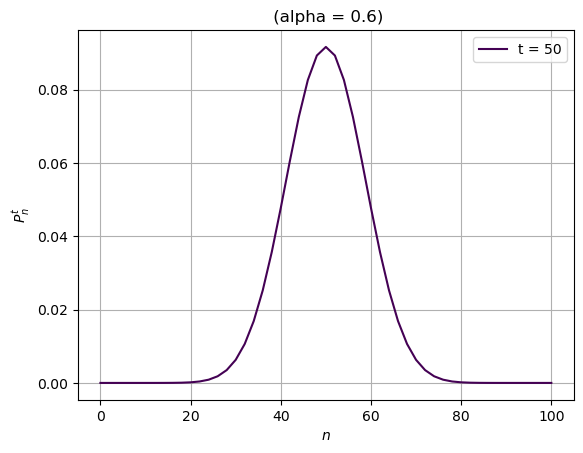

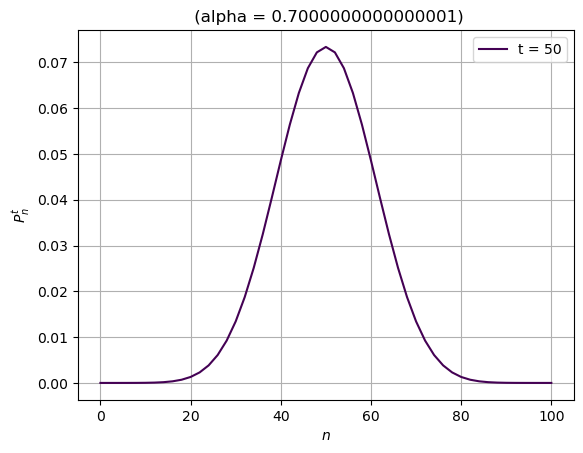

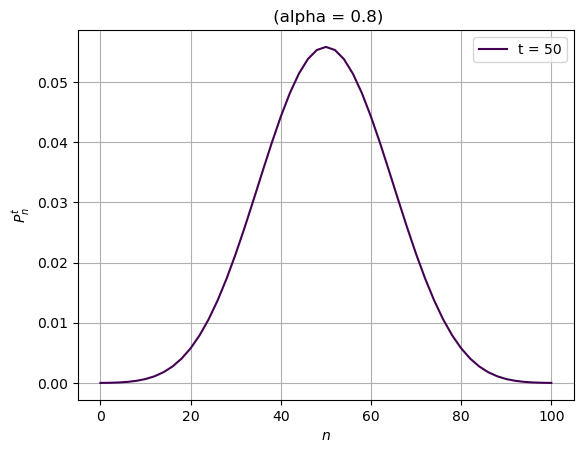

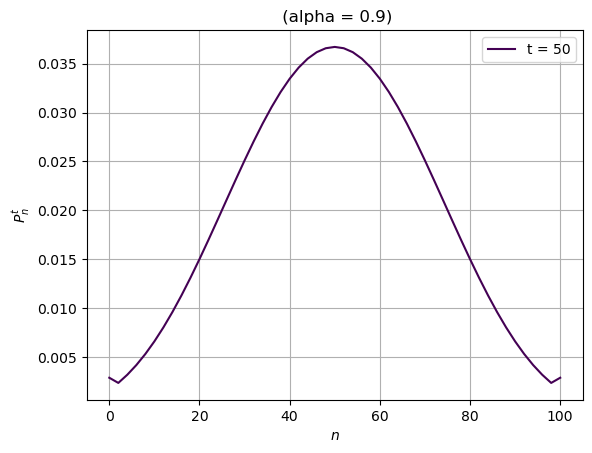

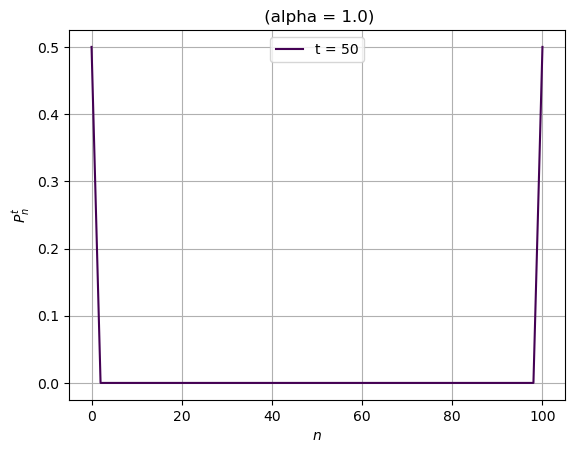

In [18]:
Ptvec_tmax = []
Stvec_tmax = []
for i, alp in enumerate(alphavec):
    cache = {}
    Pt2 = []
    St2 = []
    t = int((d-1)/2)
    Pt2.append(difusion(alp, t, A, P0))
    St2.append(disp(Pt2[-1], n0))
    Ptvec_tmax.append(Pt2)
    Stvec_tmax.append(St2)

    graf_distr(Pt2, alp)


In [19]:
def graf_var2_log(Stvec, alphavec):
    Stvec_pares = [i[2::2] for i in Stvec]
    Stvec_pares_log = np.log(Stvec_pares[1:])
    t_log = np.log(range(2, len(Stvec_pares_log[0])*2+2, 2))

    colores = plt.cm.viridis(np.linspace(0, 1, len(Stvec_pares)-1))

    fig, ax = plt.subplots()
    lines = []  # Lista para almacenar objetos de línea

    for i, (St_log, color) in enumerate(zip(Stvec_pares_log, colores)):
        alpha_value = alphavec[i+1]
        line, = ax.plot(t_log, St_log, color=color, label=f'alpha = {alpha_value}')
        lines.append(line)

    # Crear una barra de color para mostrar los valores de alpha
    cmap = cm.viridis
    norm = plt.Normalize(vmin=min(alphavec), vmax=max(alphavec))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    cbar = plt.colorbar(sm, ticks=[min(alphavec), alphavec[18], max(alphavec)], ax=ax)
    cbar.set_label('$\\alpha$')

    plt.xlabel("$\\log(t)$")
    plt.ylabel('$\\log(\\sigma^2)$')

    # Puedes comentar o eliminar la siguiente línea si no deseas mostrar la leyenda
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

    return t_log, Stvec_pares_log

In [20]:
def graf_var2(Stvec, alphavec):
    Stvec_pares = [i[0::2] for i in Stvec]
    t = range(0, len(Stvec_pares[0])*2, 2)
    colores = plt.cm.viridis(np.linspace(0, 1, len(Stvec_pares)-1))

    fig, ax = plt.subplots()
    lines = []  # Lista para almacenar objetos de línea

    for i, (St, color) in enumerate(zip(Stvec_pares, colores)):
        alpha_value = alphavec[i+1]
        line, = ax.plot(t, St, color=color, label=f'alpha = {alpha_value}')
        lines.append(line)

    # Crear una barra de color para mostrar los valores de alpha
    cmap = cm.viridis
    norm = plt.Normalize(vmin=min(alphavec), vmax=max(alphavec))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    cbar = plt.colorbar(sm, ticks=[min(alphavec), alphavec[18], max(alphavec)], ax=ax)
    cbar.set_label('$\\alpha$')

    plt.xlabel("$t$")
    plt.ylabel('$\sigma^2$')

    # Puedes comentar o eliminar la siguiente línea si no deseas mostrar la leyenda
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

    return t, Stvec_pares

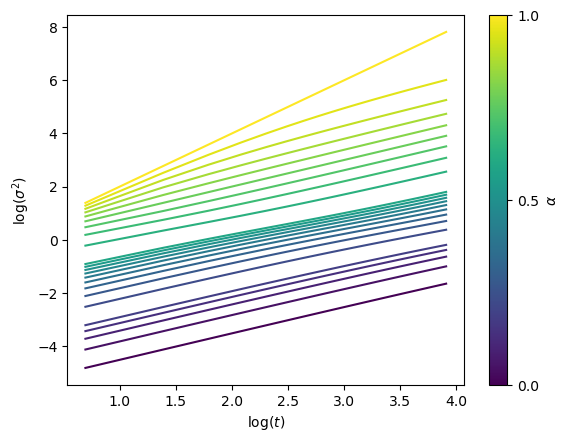

In [21]:
x_log, y_log = graf_var2_log(Stvec, alphavec)

Si se grafica el número de pasos contra la varianza, vemos que parece una relación lineal, en donde la pendiente aumenta a medida que aumenta $\alpha$.

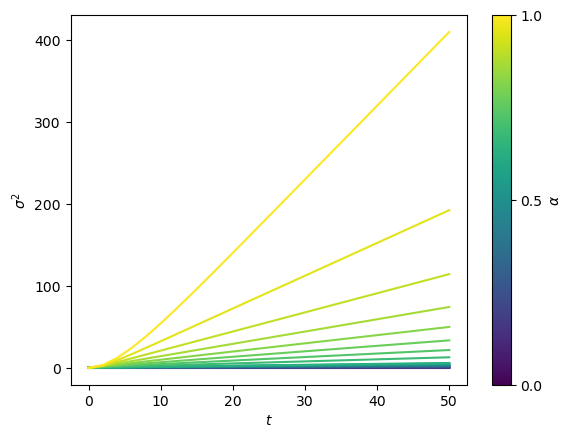

In [22]:
x, y = graf_var2(Stvec, alphavec)

In [23]:
pends = []
for Stvec_log in y_log:
    x_array = np.array(x_log)
    y_array = np.array(Stvec_log)

    # Calcula la pendiente utilizando el método de mínimos cuadrados
    pends.append(np.sum((x_array - np.mean(x_array)) * (y_array - np.mean(y_array))) / np.sum((x_array - np.mean(x_array))**2))

print (pends)

[0.9842774827331718, 0.9697248011345103, 0.956284828870618, 0.9438985624945536, 0.9325060704831025, 0.8883851822157474, 0.8607514261432223, 0.8441833263500196, 0.8348768376241699, 0.8303100242886547, 0.8288484716158137, 0.8294364922666212, 0.8313873383563012, 0.8342487919518253, 0.876725603629641, 0.9187742550575435, 0.958487631104919, 1.0, 1.0488332425074847, 1.113932120161292, 1.2146068769871512, 1.4100554512548107, 2.0]


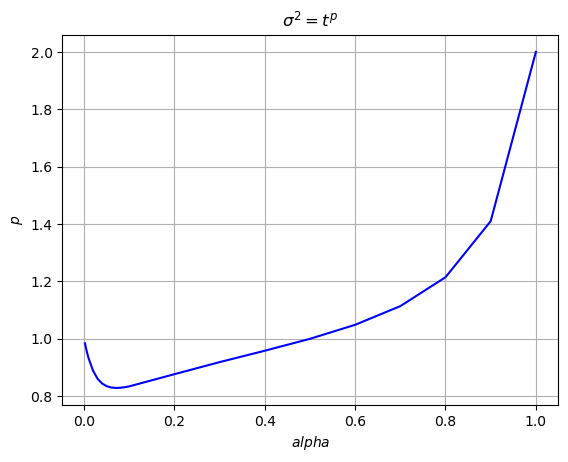

In [24]:
plt.plot(alphavec[1:], pends, color='b')
plt.title(f'$\sigma^2 = t^p$')
plt.xlabel("$alpha$")
plt.ylabel('$p$')
plt.grid(True)
plt.show()

[0.0, 0.003818903709392139, 0.007315761904612159, 0.010543720675869579, 0.013547655665935519, 0.01636544088735378, 0.028620342119489085, 0.03936942678554829, 0.049708287291212606, 0.06008814510902026, 0.07068884747958501, 0.08157824667220925, 0.09277957058501536, 0.10429949672881526, 0.11613959493760583, 0.2529891576522538, 0.43061631885732954, 0.6678990912208507, 1.0, 1.4972270447530862, 2.3222000417767625, 3.952173477563937, 8.592692810053958, 50.0]


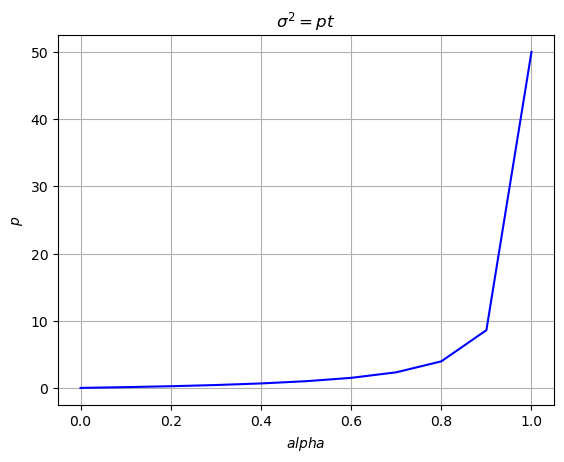

In [25]:
pends = []
for Stvec_y in y:
    x_array = np.array(x)
    y_array = np.array(Stvec_y)

    # Calcula la pendiente utilizando el método de mínimos cuadrados
    pends.append(np.sum((x_array - np.mean(x_array)) * (y_array - np.mean(y_array))) / np.sum((x_array - np.mean(x_array))**2))

print (pends)
plt.plot(alphavec, pends, color='b')
plt.title('$\sigma^2 = pt$')
plt.xlabel("$alpha$")
plt.ylabel('$p$')
plt.grid(True)
plt.show()

## Revisión analítica

Primero, se construirá la función analítica dada por:

$$
p_n^{t>0} = \left\lbrace
\begin{array}{ll}
\displaystyle p_{n=0}^t & n=0\\
\displaystyle p_{0<|n|<t}^t & 0<|n|<t\\
\displaystyle p_{|n|=t}^t & |n|=t\\
\displaystyle 0 & |n|>t
\end{array}
\right.
$$

Donde:

$$
p_{n = 0}^t = ((-1)^t+1)\cdot \left(\sum_{x=1}^{\frac{t}{2}-1} \binom{\frac{t}{2}-1}{x} \binom{\frac{t}{2}-1}{x-1}  b_{2x} + \sum_{x=1}^{\frac{t}{2}} \binom{\frac{t}{2}-1}{x-1}^2 b_{2x-1}\right)
$$

$$
p_{0<|n|<t}^t = \left|\frac{(-1)^t+(-1)^n}{2}\right|\cdot \left(\sum_{x=1}^{\frac{t-|n|}{2}-1} \left(\binom{\frac{t+n}{2}-1}{x} \binom{\frac{t-n}{2}-1}{x-1} + \binom{\frac{t+n}{2}-1}{x-1} \binom{\frac{t-n}{2}-1}{x}\right) b_{2x} \nonumber
+ \sum_{x=1}^{\frac{t-|n|}{2}} 2\binom{\frac{t+n}{2}-1}{x-1}\binom{\frac{t-n}{2}-1}{x-1} b_{2x-1} \nonumber 
+ \binom{\frac{t+|n|}{2}-1}{\frac{t-|n|}{2}} b_{t-|n|}\right)
$$

$$
    p_{|n| = t}^t = \frac{1}{2} \alpha^{t-1}
$$

$$
b_c \equiv \frac{1}{2} \alpha^{t-c-1} (1-\alpha)^c
$$

In [26]:
def bc (alpha, t, c):
    return 0.5 *(alpha**(t-c-1))*((1-alpha)**c) 

def difusion_a (alpha, t, d, n0):
    Pt = np.zeros(d)
    if t >= 1:
        for i, ptn in enumerate(Pt):
            n = i-n0+1
            if n == 0:
                result = 0
                for x in range(1, (t // 2)):
                    result += math.comb(t // 2 - 1, x) * math.comb(t // 2 - 1, x - 1) * bc (alpha,t,2*x)

                for x in range(1, (t // 2)+1):
                    result += math.comb(t // 2 - 1, x - 1) ** 2 * bc (alpha,t,2*x-1)
                Pt[i] = abs(((-1)**t+1))*result

            elif abs(n) < t and abs(n) > 0:
                result = 0

                for x in range(1, ((t-abs(n)) // 2)):
                    result += (math.comb((t+n) // 2 - 1, x) * math.comb((t-n) // 2 - 1, x - 1) +math.comb((t+n) // 2 - 1, x-1) * math.comb((t-n) // 2 - 1, x)) * bc (alpha,t,2*x)

                for x in range(1, ((t-abs(n)) // 2)+1):
                    result += 2 * math.comb( (t+n)// 2 - 1, x - 1) * math.comb( (t-n)// 2 - 1, x - 1) * bc (alpha,t,2*x-1)

                result += math.comb( (t+abs(n))// 2 - 1, (t-abs(n))// 2) * bc (alpha,t,t-abs(n))

                Pt[i] = abs(((-1)**t+(-1)**abs(n))/2)*result
            elif abs(n)==t:
                Pt[i] = 0.5 * alpha**(t-1) 
    elif t == 0:
        Pt[n0-1] = 1
    return Pt

In [27]:
Ptvec2 = []
Stvec2 = []

for alp in alphavec:
    cache = {}
    Pt2 = []
    St2 = []
    for t in range(0, int((d-1)/2)+1, 1):
        Pt2.append(difusion_a (alp, t, d, n0))
        St2.append(disp(Pt2[-1], n0))
    Ptvec2.append(Pt2)
    Stvec2.append(St2)

In [28]:
Ptvec = np.array(Ptvec)
Ptvec2 = np.array(Ptvec2)

In [29]:
diferencia = 0
for i in range(Ptvec.shape[0]):
    for j in range(Ptvec.shape[1]):
        for k in range(Ptvec.shape[2]):
            diferencia += abs(Ptvec[i, j, k]-Ptvec2[i, j, k])
print(f"La diferencia total entre los resultados de las distribuciones por ambos métodos, para {Ptvec.shape[0]} valores de alpha, {Ptvec.shape[1]} valores de número de pasos y {Ptvec.shape[2]} posiciones es de: ",diferencia)

La diferencia total entre los resultados de las distribuciones por ambos métodos, para 24 valores de alpha, 51 valores de número de pasos y 101 posiciones es de:  5.729542580751176e-13


In [30]:
Stvec = np.array(Stvec)
Stvec2 = np.array(Stvec2)

In [31]:
diferencia_s = 0
for i in range(Stvec.shape[0]):
    for j in range(Stvec.shape[1]):
            diferencia_s += abs(Stvec[i, j]-Stvec2[i, j])
print(f"La diferencia total entre los resultados de las dispersiones por ambos métodos, para {Stvec.shape[0]} valores de alpha y {Ptvec.shape[1]} valores de número de pasos es de: ",diferencia_s)

La diferencia total entre los resultados de las dispersiones por ambos métodos, para 24 valores de alpha y 51 valores de número de pasos es de:  1.5895930405296355e-11


# Caminata cuántica

In [32]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit_ibm_runtime import Sampler
from qiskit.circuit.library import C3XGate
import math
from math import log
from qiskit.visualization import matplotlib as mpl

#QiskitRuntimeService.save_account(channel="ibm_quantum", token="4d1504cf13972dbecdf7c44c0ea13bdf11cc365c83ef8e1c38edc29ba8876af29a0cbd5a37baf17babbc9d0941a56de4fc227cd431ea59b3a59a6a7f6fb16482", set_as_default=True)

In [33]:
service = QiskitRuntimeService()
# backend = service.least_busy(simulator=False, operational=True)
backend = service.get_backend("ibmq_qasm_simulator")

In [34]:
sampler = Sampler(backend=backend)

Se definen la cantidad de nodos (mínimos) y según ese número, la cantidad de qubits necesarios para representarlos:

In [35]:
d = 101
n0 = 50
qubits = math.ceil(log(d)/log(2))
alpha = 0.5
steps = 50
print(qubits)

7


Se añade el registro de qubits que almacenará las $d$ posiciones (qubits) y el qubit de moneda. También añade los bits donde se registrarán las mediciones de posición:

Inicializamos la moneda según:

$$
C = \begin{pmatrix}
\sqrt{\alpha} & \sqrt{1-\alpha}\\
\sqrt{1-\alpha} & -\sqrt{\alpha}
\end{pmatrix}
$$

y el estado de posición a 000, que representa la posición $n=0$. Y el estado de moneda lo iniciamos según:



$$
\frac{1}{\sqrt{2}} ((\sqrt{\alpha}+\sqrt{1-\alpha})|0\rangle + (\sqrt{1-\alpha}−\sqrt{\alpha})|1\rangle))\otimes|j\rangle
$$

In [36]:
def init_circ(qubits,alpha):
    qreg_q = QuantumRegister(qubits+1, 'q')
    creg_c = ClassicalRegister(qubits, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)
    circuit.reset(qreg_q)
    C = [[math.sqrt(alpha), math.sqrt(1-alpha)], [math.sqrt(1-alpha), -math.sqrt(alpha)]]
    ang = 2*math.acos((math.sqrt(alpha)+math.sqrt(1-alpha))/math.sqrt(2))
    circuit.ry(ang, qreg_q[0])
    circuit.rz(3 * np.pi / 2, qreg_q[0])
    return C, circuit, qreg_q, creg_c

Esta es una función que permite construir una compuerto de not controlada con varios qubit de control. 

In [37]:
def mcx(circuit, control, target):
    control_qubits = list(range(control + 1))
    target_qubit = target
    circuit.mcx(control_qubits, target_qubit)


Esta es una función que permite construir la parte del operador desplazamiento que desplaza a la derecha.

In [38]:
def S_right(circuit, qubits):
    for i in range(qubits-1, -1, -1):
        mcx(circuit, i, i+1)

Esta es una función que permite construir la parte del operador desplazamiento que desplaza a la izquierda.

In [39]:
def S_left(circuit, qubits):
    circuit.x(qreg_q[:-1])
    for i in range(qubits-1, -1, -1):
        mcx(circuit, i, i+1)
        circuit.x(qreg_q[i])

Esta función permite realizar las mediciones en posición.

In [40]:
def measure(circuit, qreg_q, creg_c):
    for (q,c) in zip(qreg_q[1:], creg_c):
        circuit.measure(q, c)

Esta función aplica un paso en la caminata. Aplica el operador moneda y después el operador de desplazamiento:

In [41]:
def step (circuit, qubits, C, qreg_q):
    circuit.unitary(C, qreg_q[0])
    S_right(circuit, qubits)
    S_left(circuit, qubits)

Esta función aplica un paso en la caminata. Aplica el operador moneda de Hadamard y después el operador de desplazamiento:

In [42]:
def step_h (circuit, qubits, qreg_q):
    circuit.h(qreg_q[0])
    S_right(circuit, qubits)
    S_left(circuit, qubits)

Esta función aplica una caminata con cierta cantidad de pasos, y al final realiza una medición sobre el estado de posición:

In [43]:
def walk(circuit, qubits, C, qreg_q, steps, n0,d):
    for _ in range (steps):
        step(circuit, qubits, C, qreg_q)
    measure(circuit,qreg_q,creg_c)
    job = sampler.run(circuit)
    result = job.result()
#     print(f">>> {result}")
#     print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
#     print(f"  > Metadata: {result.metadata[0]}")
    Pt = np.zeros(d)
    for key in result.quasi_dists[0]:
        if int(key) <= n0:
            i = n0 + int(key)
        else:
            i = n0 - (2**qubits-int(key))
#         print(key, i, result.quasi_dists[0][key])
        Pt[i]= result.quasi_dists[0][key]
    return Pt

In [44]:
C, circuit, qreg_q, creg_c = init_circ(qubits, alpha)
Pt_q = []
Pt_q.append(walk(circuit, qubits, C, qreg_q, steps, n0,d))

In [45]:
print (Pt_q)

[array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.00775, 0.     ,
       0.05875, 0.     , 0.161  , 0.     , 0.13325, 0.     , 0.01625,
       0.     , 0.0895 , 0.     , 0.01175, 0.     , 0.03725, 0.     ,
       0.0365 , 0.     , 0.009  , 0.     , 0.02725, 0.     , 0.02425,
       0.     , 0.0245 , 0.     , 0.01225, 0.     , 0.01125, 0.     ,
       0.015  , 0.     , 0.0145 , 0.     , 0.0145 , 0.     , 0.014  ,
       0.     , 0.0135 , 0.     , 0.01475, 0.     , 0.01375, 0.     ,
       0.01125, 0.     , 0.01125, 0.     , 0.01575, 0.     , 0.0145 ,
       0.     , 0.014  , 0.     , 0.0075 , 0.     , 0.0105 , 0.     ,
       0.014  , 0.     , 0.013  , 0.     , 0.004  , 0.     , 0.019  ,
       0.     , 0.01025, 0.     , 0.01725, 0.     , 0.0095 , 0.     ,
       0.04475, 0.     , 0.0195 , 0.     , 0.0035 , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0. 

In [46]:
#circuit.draw(output='mpl',style='clifford')

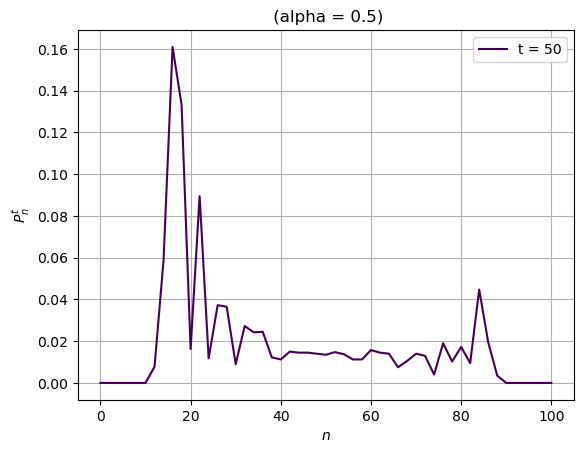

In [47]:
graf_distr(Pt_q, alpha)


Pero vemos que este es una caminata no simétrica. Esto se debe a que la moneda introduce un signo negativo al aplicarse al estado $|1\rangle$, por lo que habrán más cancelaciones en este sentido. Para ello, se puede introducir amplitudes complejas, que permitan que no se cancelen en ningún caso.

Para esto, el estado inicial deberá ser:

$$
| \psi_0 \rangle=\frac{1}{\sqrt {2}} [((\sqrt{1-\alpha}+\sqrt{\alpha})−i(\sqrt{\alpha}−\sqrt{1-\alpha}))|0\rangle+((\sqrt{1-\alpha}−\sqrt{\alpha})−i(\sqrt{\alpha}+\sqrt{1-\alpha}))|1\rangle]⊗|j\rangle
$$

Así que construimo otro estado inicial:

In [48]:
import cmath
from qiskit import QuantumCircuit, transpile, Aer, assemble, execute
from qiskit.visualization import plot_bloch_multivector

def init_circ2(qubits,alpha):
    qreg_q = QuantumRegister(qubits+1, 'q')
    creg_c = ClassicalRegister(qubits, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)
    circuit.clear()
    circuit.reset(qreg_q)
    C = [[math.sqrt(alpha), math.sqrt(1-alpha)], [math.sqrt(1-alpha), -math.sqrt(alpha)]]
    A0 = complex((1/2)*(math.sqrt(alpha)+math.sqrt(1-alpha)), -(1/2)*(math.sqrt(alpha)-math.sqrt(1-alpha)))
    ang1 = 2*cmath.acos(A0).real

    B0 = complex((1/2)*(math.sqrt(1-alpha)-math.sqrt(alpha)), -(1/2)*(math.sqrt(1-alpha)+math.sqrt(alpha)))
    if ang1 == 0:
        ang2 = 0
    else:
        ang2 = cmath.acos(((B0/cmath.sin(ang1/2)).real)).real 
    circuit.ry(ang1, qreg_q[0])
    circuit.rz(ang2, qreg_q[0])

    return C, circuit, qreg_q, creg_c


Pero vemos que este es una caminata no simétrica. Esto se debe a que la moneda introduce un signo negativo al aplicarse al estado $|1\rangle$, por lo que habrán más cancelaciones en este sentido. Para ello, se puede introducir amplitudes complejas, que permitan que no se cancelen en ningún caso.

Para esto, el estado inicial deberá ser:

$$
| \psi_0 \rangle=\frac{1}{\sqrt {2}} (|0\rangle-i|1\rangle)⊗|j\rangle
$$

Aunque en este caso, el primer paso deberá ser utilizando la moneda de Hadamard. Así que construimo otro estado inicial:

In [52]:
import cmath
from qiskit import QuantumCircuit, transpile, Aer, assemble, execute
from qiskit.visualization import plot_bloch_multivector

def init_circ3(qubits,alpha):
    qreg_q = QuantumRegister(qubits+1, 'q')
    creg_c = ClassicalRegister(qubits, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)
    circuit.clear()
    circuit.reset(qreg_q)
    C = [[math.sqrt(alpha), math.sqrt(1-alpha)], [math.sqrt(1-alpha), -math.sqrt(alpha)]]

    circuit.ry(np.pi/2, qreg_q[0])
    circuit.rz(3*np.pi/2, qreg_q[0])
    step_h (circuit, qubits, qreg_q)
    return C, circuit, qreg_q, creg_c


Y ahora, veremos el comportamiento para otros valores de alpha:

In [53]:
alphavec = np.arange(0, 1.1, 0.1)
print(alphavec)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


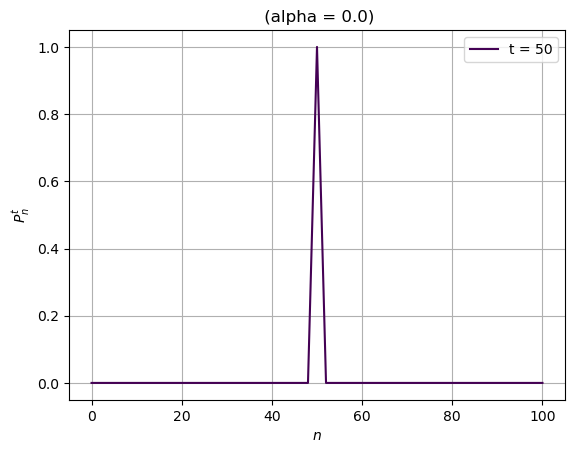

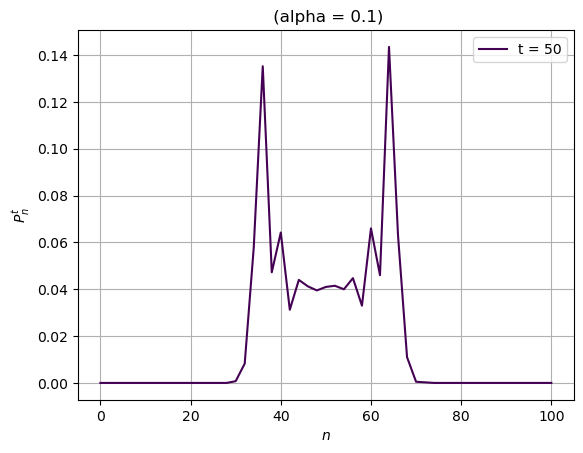

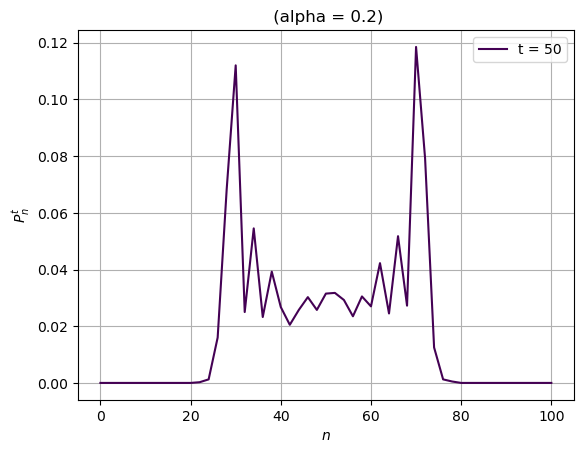

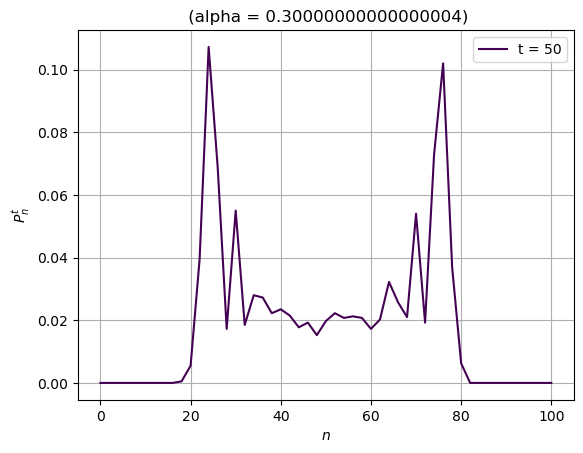

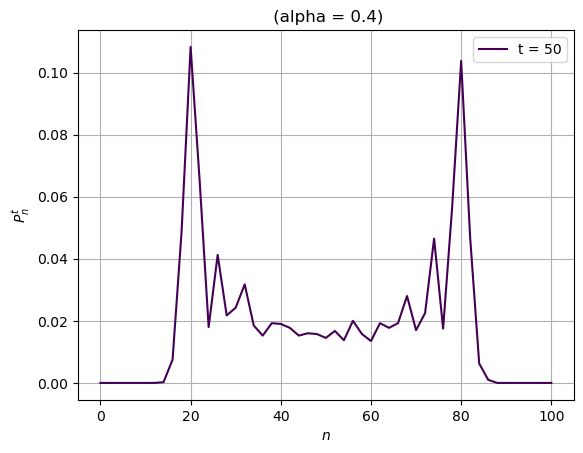

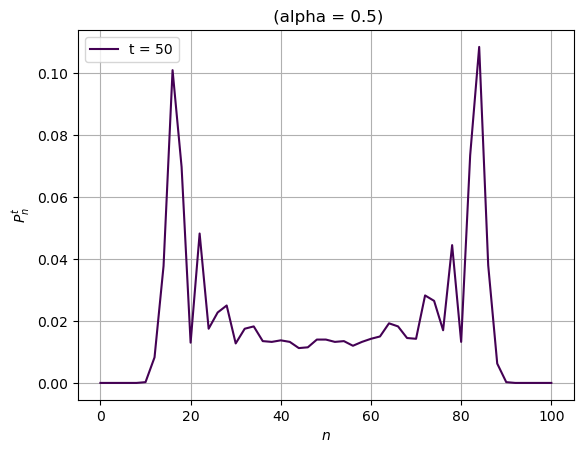

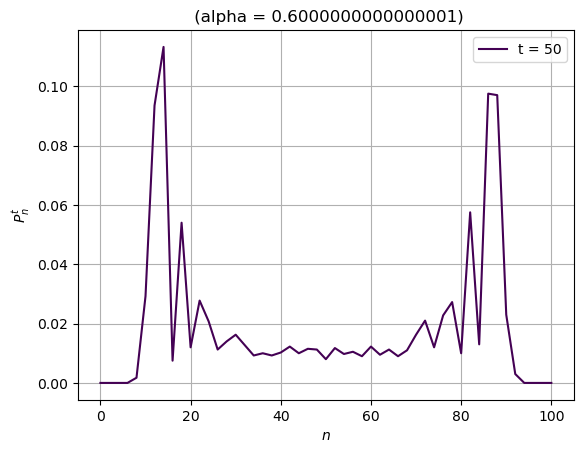

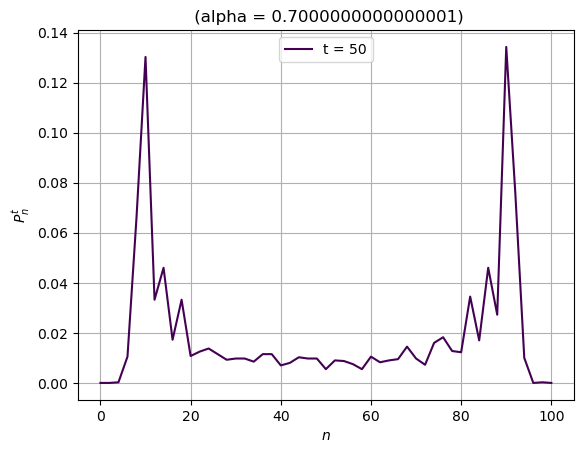

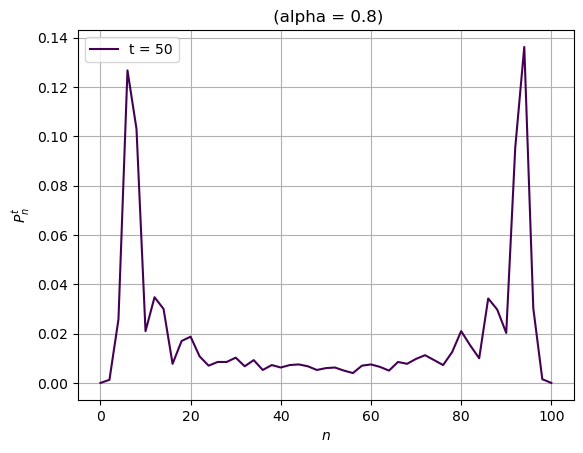

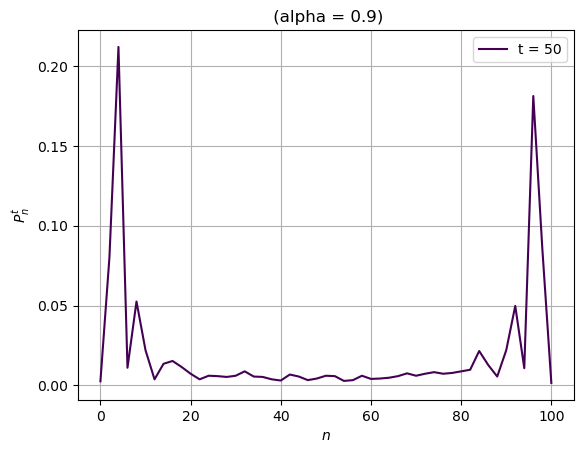

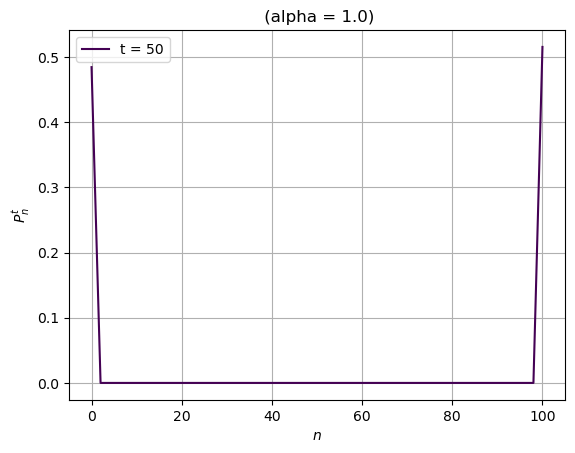

In [54]:
Ptvec_tmax_q = []
Stvec_tmax_q = []


for i, alp in enumerate(alphavec):
    Pt_q = []
    St_q = []
    
    C, circuit, qreg_q, creg_c = init_circ3(qubits, alp)
    
    Pt_q.append(walk(circuit, qubits, C, qreg_q, steps-1, n0,d))
    St_q.append(disp(Pt_q[-1], n0))
    Ptvec_tmax_q.append(Pt_q)
    Stvec_tmax_q.append(St_q)
    graf_distr(Pt_q, alp)

In [55]:
Stvec_tmax_q

[[1.0],
 [129.32799999999997],
 [260.94599999999997],
 [409.78200000000004],
 [562.2320000000001],
 [731.3300000000002],
 [938.324],
 [1149.4420000000005],
 [1389.5779999999997],
 [1692.8579999999997],
 [2504.1]]